In [34]:
#import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import requests
import datetime as dt
import numpy as np

#st.title("CNN JOB MON")

def load_data():
    url = 'http://43.202.66.118:8077/all'
    r = requests.get(url)
    d = r.json()

    return d

In [35]:
data = load_data()
df = pd.DataFrame(data)
df

,num,file_name,label,file_path,request_time,request_user,prediction_model,prediction_result,prediction_time
0,1,7_25452.png,,/home/ubuntu/images/n11/0bacd2a5-d393-4152-a50...,2024-09-25 10:30:38,n11,n01,6,2024-09-25 10:31:01
1,2,7_25452.png,,/home/ubuntu/images/n11/4410feba-fde6-4107-81c...,2024-09-25 10:30:39,n11,randint,8,2024-09-25 10:31:01
2,3,7_25452.png,,/home/ubuntu/images/n11/e238684e-3caa-4417-aba...,2024-09-25 10:30:39,n11,n77,5,2024-09-25 10:31:02
3,4,7_25452.png,,/home/ubuntu/images/n11/db967479-5ffc-492b-b92...,2024-09-25 10:30:39,n11,n04,7,2024-09-25 10:31:02
4,5,7_25452.png,,/home/ubuntu/images/n11/59fc767d-3834-4b31-857...,2024-09-25 10:30:39,n11,mnist240924.keras,8,2024-09-25 10:31:05
...,...,...,...,...,...,...,...,...,...
299,303,1.jpeg,1,/home/ubuntu/images/n23/635c0ffe-838b-4d77-927...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:57:47
300,304,1.jpeg,1,/home/ubuntu/images/n23/a1a38ed5-6e5c-45cd-958...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:57:54
301,305,1.jpeg,1,/home/ubuntu/images/n23/c5833f20-363b-470e-904...,2024-09-25 16:56:41,n23,randint,5,2024-09-25 16:58:02
302,306,1.jpeg,1,/home/ubuntu/images/n23/7430e34c-ed14-4b0b-8c7...,2024-09-25 16:56:41,n23,n04,1,2024-09-25 16:58:29


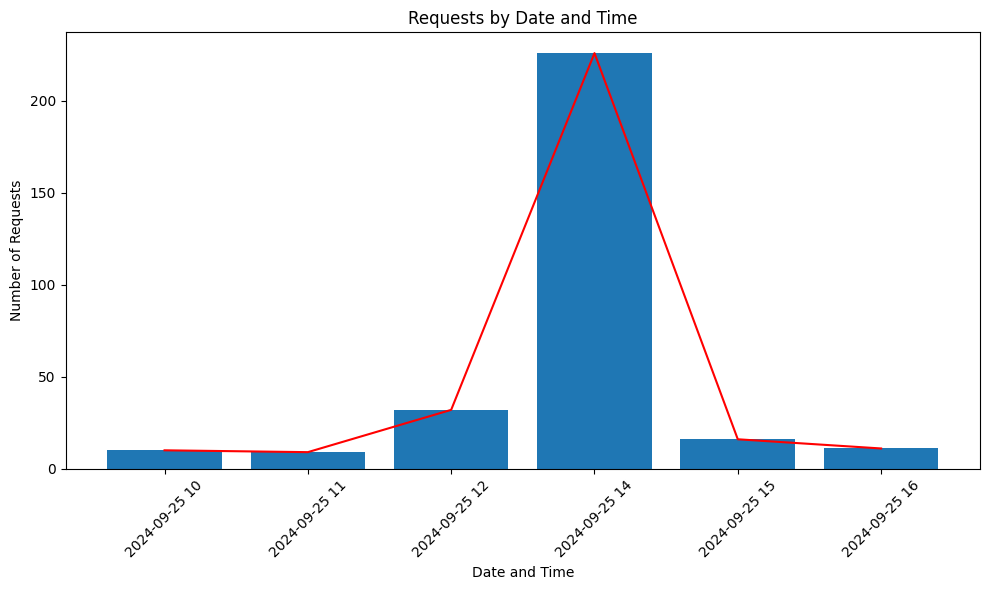

In [49]:
# request_time을 datetime으로 변환
df['request_time'] = pd.to_datetime(df['request_time'])

# request_time을 시간 단위로 그룹화하고 요청 수 계산
df['request_hour'] = df['request_time'].dt.strftime('%Y-%m-%d %H')  # 시간 단위로 포맷
df_grouped = df.groupby('request_hour').size().reset_index(name='Number of Requests')

# x축을 시간으로, y축을 요청 수로 하는 그래프 그리기
x = df_grouped['request_hour']
y = df_grouped['Number of Requests']

plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.plot(x,y, 'r')
plt.xticks(rotation=45)  # x축 레이블이 겹치지 않도록 90도 회전
plt.xlabel('Date and Time')
plt.ylabel('Number of Requests')
plt.title('Requests by Date and Time')

plt.tight_layout()  # 레이아웃 조정
plt.show()

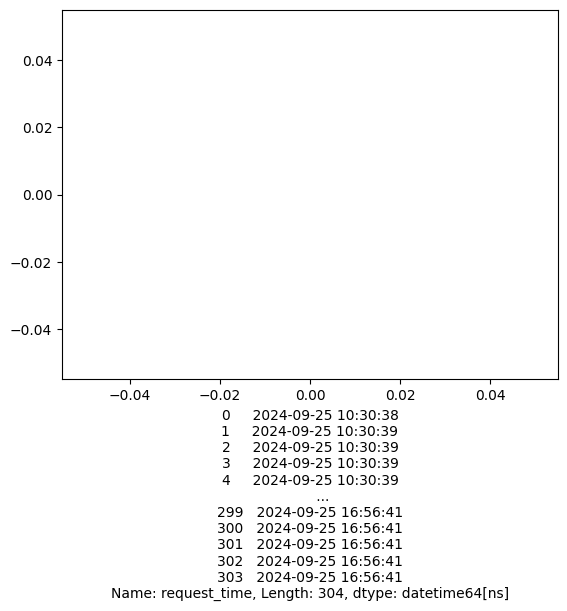